In [1]:
import matplotlib.pyplot as plt
import statistics
import numpy as np


In [3]:
# input the data by hand, small dataset
sequential = [4718, 4596, 4562, 4575, 4514, 4553, 4467, 4489, 4483, 4535]
mpi = {
    "1": [4345, 4215, 4196, 4244, 4481, 4242, 4297, 4217, 4270, 4297],
    "2": [2305, 2569, 2431, 2414, 2301, 2624, 2421, 2361, 2285, 2377],
    "4": [2099, 2237, 1788, 1947, 1718, 1695, 1682, 1663, 1736, 1843],
    "8": [1538, 1653, 1675, 1758, 1666, 1616, 1613, 1646, 1688, 1663],
}

In [4]:
sequential_mean = statistics.mean(sequential)
sequential_median = statistics.median(sequential)
sequential_90p = np.percentile(sequential, 90)
print(f"Sequential mean: {sequential_mean}, median: {sequential_median}, 90th percentile: {sequential_90p}")

Sequential mean: 4549.2, median: 4544.0, 90th percentile: 4608.2


In [5]:
keys = list(mpi.keys())
mpi_stats = {}
for key in keys:
    mpi_stats[key] = {
        "mean": statistics.mean(mpi[key]),
        "median": statistics.median(mpi[key]),
        "90p": np.percentile(mpi[key], 90),
    }

for key in keys:
    print(f"For {key} mpi processes mean: {mpi_stats[key]['mean']}, median: {mpi_stats[key]['median']}, 90th percentile: {mpi_stats[key]['90p']}")

For 1 mpi processes mean: 4280.4, median: 4257.0, 90th percentile: 4358.6
For 2 mpi processes mean: 2408.8, median: 2395.5, 90th percentile: 2574.5
For 4 mpi processes mean: 1840.8, median: 1762.0, 90th percentile: 2112.7999999999997
For 8 mpi processes mean: 1651.6, median: 1658.0, 90th percentile: 1695.0


In [7]:
keys = list(mpi.keys())
speedups = {}
for key in keys:
    speedups[key] = {
        "mean": sequential_mean / mpi_stats[key]["mean"],
        "median": sequential_median / mpi_stats[key]["median"],
        "90p": sequential_90p / mpi_stats[key]["90p"],
    }
for key in keys:
    print(f"For {key} mpi processes mean speedup: {speedups[key]['mean']}, median speedup: {speedups[key]['median']}, 90th percentile speedup: {speedups[key]['90p']}")

For 1 mpi processes mean speedup: 1.062797869358004, median speedup: 1.0674183697439512, 90th percentile speedup: 1.0572660946175376
For 2 mpi processes mean speedup: 1.8885752241780138, median speedup: 1.896890002087247, 90th percentile speedup: 1.7899397941347834
For 4 mpi processes mean speedup: 2.471316818774446, median speedup: 2.5788876276958, 90th percentile speedup: 2.181086709579705
For 8 mpi processes mean speedup: 2.7544199564059095, median speedup: 2.7406513872135103, 90th percentile speedup: 2.718702064896755


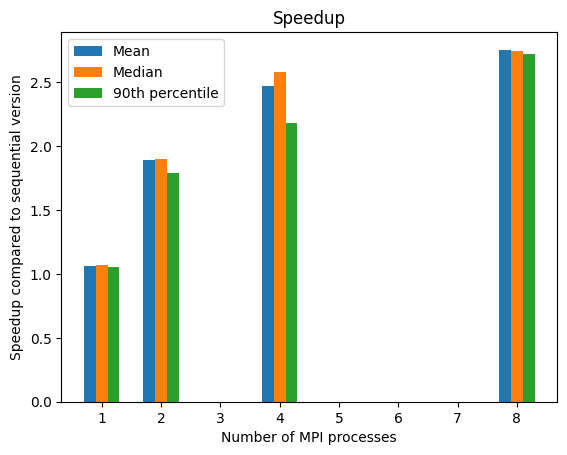

In [20]:
xmean = [int(x) - 0.2 for x in list(mpi.keys())]
xmedian = [int(x) for x in list(mpi.keys())]
x90p = [int(x) + 0.2 for x in list(mpi.keys())]
ymean = [speedups[str(key)]["mean"] for key in xmedian]
ymedian = [speedups[str(key)]["median"] for key in xmedian]
y90p = [speedups[str(key)]["90p"] for key in xmedian]
width = 0.2
plt.bar(xmean, ymean, width)
plt.bar(xmedian, ymedian, width)
plt.bar(x90p, y90p, width)
plt.legend(["Mean", "Median", "90th percentile"])
plt.xlabel("Number of MPI processes")
plt.ylabel("Speedup compared to sequential version")
plt.title("Speedup")
plt.savefig("figs/speedup.png")